# Classification

## Decision Tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset into a pandas dataframe
data = pd.read_csv('/content/seattle-weather.csv')

# Preprocess the data
# Handle missing values
data = data.dropna()

# Split the dataset into input and output
X = data[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = data['weather']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a machine learning algorithm and fit it to the training data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate the performance of the model on the testing data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Use the trained model to predict the weather condition for new data
new_data = pd.DataFrame({'precipitation': [0.2], 'temp_max': [25], 'temp_min': [15], 'wind': [10]})
predicted_condition = clf.predict(new_data)
print('Predicted weather condition:', predicted_condition[0])


Accuracy: 0.7337883959044369
Predicted weather condition: rain


## Multiple linear regression *

Mean Squared Error: 0.08477521336916084
R-squared: 0.18324813321931424


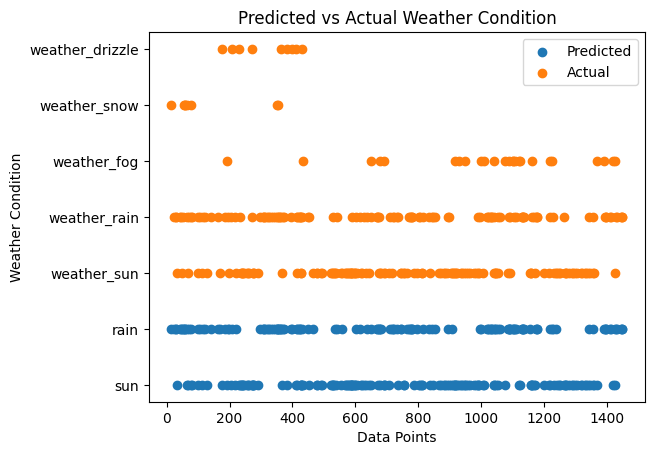

Prediction: rain


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# load the dataset
df = pd.read_csv('/content/seattle-weather.csv')

# handle missing values
df.fillna(method='ffill', inplace=True)

# convert categorical variables into numerical variables
df = pd.get_dummies(df, columns=['weather'])

# split the data into training and testing sets
X = df[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = df[['weather_drizzle', 'weather_rain', 'weather_sun', 'weather_snow', 'weather_fog']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a linear regression model
model = LinearRegression()

# train the model
model.fit(X_train, y_train)

# predict the weather condition for the test data
y_pred = model.predict(X_test)

# evaluate the performance of the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

# visualize the predicted weather condition for the test data
y_pred_labels = ['drizzle', 'rain', 'sun', 'snow', 'fog']
y_pred_index = np.argmax(y_pred, axis=1)
y_pred_labels = np.array(y_pred_labels)[y_pred_index]
plt.scatter(y_test.index, y_pred_labels, label='Predicted')
plt.scatter(y_test.index, y_test.idxmax(axis=1), label='Actual')
plt.xlabel('Data Points')
plt.ylabel('Weather Condition')
plt.title('Predicted vs Actual Weather Condition')
plt.legend()
plt.show()

# use the model to predict the weather condition for new data
new_data = np.array([10, 25, 15, 5]).reshape(1, -1)
prediction = model.predict(new_data)
prediction_label = y_pred_labels = ['drizzle', 'rain', 'sun', 'snow', 'fog'][np.argmax(prediction)]
print('Prediction:', prediction_label)


# Clustering


### Kmeans

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


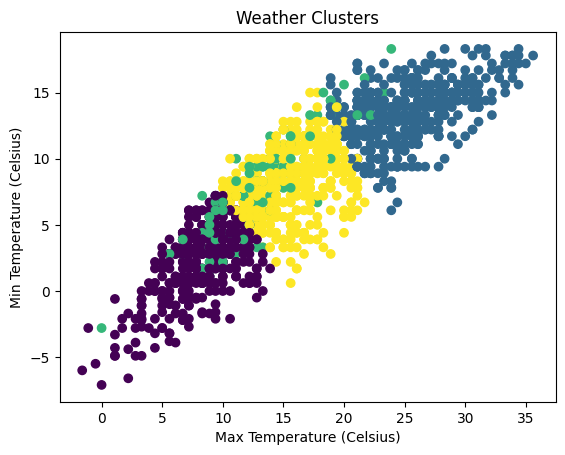

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset into a pandas dataframe
data = pd.read_csv('/content/seattle-weather.csv')

# Preprocess the data
# Handle missing values
data = data.dropna()
# Extract the numerical variables
X = data[['precipitation', 'temp_max', 'temp_min', 'wind']]

# Choose the number of clusters
k = 4

# Cluster the data using K-Means algorithm
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)

# Visualize the clusters using a scatter plot
plt.scatter(X['temp_max'], X['temp_min'], c=labels)
plt.xlabel('Max Temperature (Celsius)')
plt.ylabel('Min Temperature (Celsius)')
plt.title('Weather Clusters')
plt.show()


### Agglomerative Clustering

Silhouette score: 0.3516218535932107


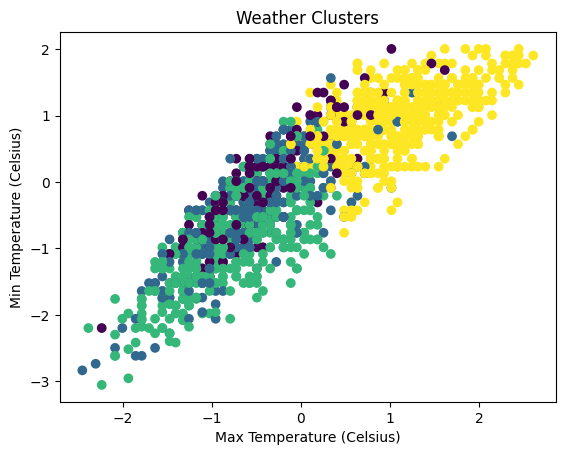

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the dataset into a pandas dataframe
data = pd.read_csv('/content/seattle-weather.csv')

# Preprocess the data
# Handle missing values
data = data.dropna()
# Extract the numerical variables
X = data[['precipitation', 'temp_max', 'temp_min', 'wind']]
# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose the number of clusters
k = 4

# Cluster the data using Agglomerative clustering algorithm
agg_clustering = AgglomerativeClustering(n_clusters=k)
labels = agg_clustering.fit_predict(X)

# Evaluate the performance of the clustering using silhouette score
silhouette_avg = silhouette_score(X, labels)
print('Silhouette score:', silhouette_avg)

# Visualize the clusters using a scatter plot
plt.scatter(X[:, 1], X[:, 2], c=labels)
plt.xlabel('Max Temperature (Celsius)')
plt.ylabel('Min Temperature (Celsius)')
plt.title('Weather Clusters')
plt.show()


# Association Mining

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import ipywidgets as widgets
from IPython.display import display

# Load the dataset into a pandas dataframe
data = pd.read_csv('/content/seattle-weather.csv')

# Preprocess the data
# Handle missing values
data = data.dropna()
# Extract the categorical variable 'weather'
data['weather'] = data['weather'].astype('category')

# Convert the remaining values to boolean data type
bool_data = data.iloc[:, 1:].astype(bool)

# Perform association rule mining using Apriori algorithm
frequent_itemsets = apriori(bool_data, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.8)

# Sort the rules by lift and limit the number of rules
sorted_rules = rules.sort_values('lift', ascending=False)[:10]

# Create an interactive table to display the association rules
table = widgets.HTML(
    value=sorted_rules.to_html(),
    placeholder='No rules to display',
    description='Association Rules:',
)

# Display the interactive table
display(table)


HTML(value='<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></…